# Home Credit Default Risk - Kaggle Project EDA

### By: Ali Ladha


# Table of Contents:

1. [Introduction and Purpose](#Introduction-and-Purpose)
   - [Objectives](#Objectives)
   - [Questions](#Questions)
   - [Goal](#Goal)
   - [Importing Packages](#Importing-Packages)
   - [Loading Data](#Loading-Data)
2. [Data Description: Exploring Target Variable](#Exploring-Target-Variable)
3. [Checking Missing Values for Train](#Checking-Missing-Values-for-Train)
   - [Checking Missing Values for Test](#Checking-Missing-Values-for-Test)
5. [Data Cleaning](#Data-Cleaning)
   - [Dropping large missing data and Categoricals missing Any Data](#Dropping-large-missing-data-and-Categoricals-missing-Any-Data)
   - [Imputing remainder missing data](#Imputing-remainder-missing-data)
   - [Adjusting both Train and Test dataset](#Adjusting-both-Train-and-Test-dataset)
   - [Imputing Outliers](#Imputing-Outliers)
6. [Correlation Table](#Correlation-Table)
   - [Correlation Heatmap](#Correlation-Heatmap)
9. [Preliminary Logistic Model](#Preliminary-Logistic-Model)
10. [Summary and Overall Insights with Ethical Considerations](#Summary-and-Overall-Insights-with-Ethical-Considerations)


# Introduction and Purpose

The overall goal of this project is to look at telco and financial data to predict whether a client will default on a loan.  
The project aims to benefit Home Credit in determining prospective clients based on collected data.

This specific project is more towards exploring the data that we have available to see if we can gather insights. 

## **Objectives**
1. Understand the target variable (TARGET):
2. Identify important predictors using statistics and visualizations.
3. Create and train a Logistic Regression model
4. Check the score of the model by using: accuracy, confusion matrix, and a ROC/AUC score.

## **Questions**
1. What are the Top Positive predictors for Default
2. What are the Top Negative predictors for Default
3. What are the business and ethical implications of selecting clients with only these predictors

## **Goal**
1. Reducing the likelihood of default: by identifying the main predictors that are positively and negatively correlated with it

## Importing Packages

In [8]:

#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler


## Loading Data

In [10]:
app_train = pd.read_csv('application_train.csv')
bureau = pd.read_csv('bureau.csv')

app_test = pd.read_csv('application_test.csv')

In [11]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
print(app_train.shape)

(307511, 122)


In [14]:
print(app_test.shape)

(48744, 121)


# Exploring Target Variable



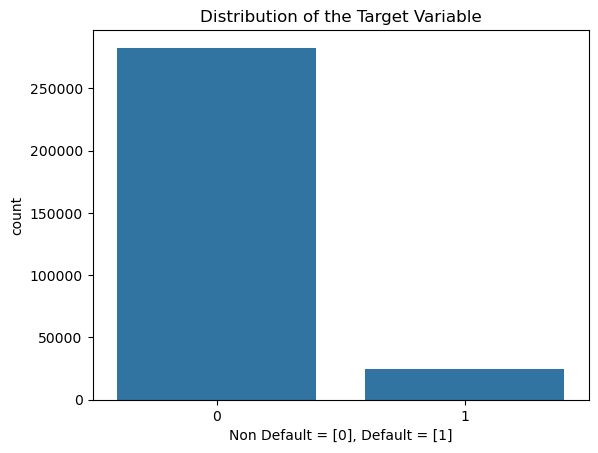

In [16]:
sns.countplot(x = app_train['TARGET'])
plt.title('Distribution of the Target Variable')
plt.xlabel('Non Default = [0], Default = [1]')
plt.show()

In [17]:
# Obtaining Target variable proportion

In [18]:
target_prop = round(app_train.value_counts(subset='TARGET', normalize=True),2)
print(target_prop)

print(f'The proportion of Non Defaulters [0] is {target_prop[0]}')
print(f'The proportion of Defaulters [1] is {target_prop[1]} ')


TARGET
0    0.92
1    0.08
Name: proportion, dtype: float64
The proportion of Non Defaulters [0] is 0.92
The proportion of Defaulters [1] is 0.08 


Data Description:


It appears we have a higher proportion of clients not having payment difficulties on loans compared to clients that have payment difficulties.
The above countplot illustrates this with a proportion of 92% for non default compared to 8% for default.

Additionally we have roughly 300,000 rows of data on the Train set with 122 columns
Whereas we have 48,000 rows of data on the Test set with 121 columns (as it excludes the Target variable)

# Checking Missing Values for Train

In [21]:
# Calculating missing values

In [22]:
missing_values = app_train.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(app_train) * 100)

print(f'Showing first 10 missing data columns: \n \n \n{missing_percent.loc[missing_percent > 0].head(10)}')



Showing first 10 missing data columns: 
 
 
COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
dtype: float64


In [23]:
# Showing the data that has missing values > 50%

In [24]:
missing_data_over_50 = missing_percent[missing_percent > 50]
print(missing_data_over_50.index)
print('\n')
print(f'There are: {len(missing_data_over_50)} columns missing data over 50%')

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE'],
      dtype='object')


There are: 41 columns missing data over 50%


In [25]:
missing_data_over_50

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MODE           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
NONLIVINGAREA_AVG           55.179164
NONLIVINGARE

In [26]:
app_train.drop(columns = missing_data_over_50.index, inplace=True)

In [27]:
app_train.shape

(307511, 81)

# Checking Missing Values for Test

In [29]:
# Calculating missing values

In [30]:
missing_values_test = app_test.isnull().sum().sort_values(ascending=False)
missing_percent_test = (missing_values_test / len(app_test) * 100)

print(f'Showing first 10 missing data columns: \n \n \n{missing_percent_test.loc[missing_percent_test > 0].head(10)}')



Showing first 10 missing data columns: 
 
 
COMMONAREA_AVG              68.716150
COMMONAREA_MODE             68.716150
COMMONAREA_MEDI             68.716150
NONLIVINGAPARTMENTS_AVG     68.412523
NONLIVINGAPARTMENTS_MODE    68.412523
NONLIVINGAPARTMENTS_MEDI    68.412523
FONDKAPREMONT_MODE          67.284179
LIVINGAPARTMENTS_AVG        67.249302
LIVINGAPARTMENTS_MODE       67.249302
LIVINGAPARTMENTS_MEDI       67.249302
dtype: float64


In [31]:
# Showing the data that has missing values > 50%

In [32]:
missing_data_over_50_test = missing_percent_test[missing_percent_test > 50]
print(missing_data_over_50_test.index)
print('\n')
print(f'There are: {len(missing_data_over_50_test)} columns missing data over 50%')

Index(['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG',
       'FLOORSMIN_MODE', 'OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_MODE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE',
       'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI',
       'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'ELEVATORS_AVG'],
      dtype='object')


There are: 29 columns missing data over 50%


There is a considerable amount of missing data.

<br> In the next section: </br>
<br> We will drop Null values greater than 50% for both train and test columns and impute the rest with the median.
Since a model will eventually be created: both train and test must have the same columns (except for TARGET)


# Data Cleaning

## Dropping large missing data and Categoricals missing Any Data

## For Train

In [37]:
app_train.drop(columns = missing_data_over_50.index, inplace=True , errors='ignore')

In [38]:
app_train.drop(columns = missing_data_over_50_test.index, inplace=True, errors='ignore')

In [39]:
#Finding the Null categoricals

In [40]:
cat_null = app_train.select_dtypes('object').isnull().any().loc[lambda x: x]
cat_null.index

Index(['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE'], dtype='object')

In [41]:
app_train.select_dtypes(exclude=np.number).isnull().sum() >0

NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
FLAG_OWN_REALTY               False
NAME_TYPE_SUITE                True
NAME_INCOME_TYPE              False
NAME_EDUCATION_TYPE           False
NAME_FAMILY_STATUS            False
NAME_HOUSING_TYPE             False
OCCUPATION_TYPE                True
WEEKDAY_APPR_PROCESS_START    False
ORGANIZATION_TYPE             False
EMERGENCYSTATE_MODE            True
dtype: bool

In [42]:
app_train.drop(columns = cat_null.index, inplace=True)

In [43]:
app_train.shape

(307511, 78)

In [44]:
app_train.select_dtypes(exclude=np.number).isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

## For Test

In [46]:
app_test.drop(columns = missing_data_over_50.index, inplace=True)


In [47]:
app_test.drop(columns = missing_data_over_50_test.index, inplace=True, errors='ignore')


In [48]:
#Finding the Null categoricals

In [49]:
cat_null = app_test.select_dtypes('object').isnull().any().loc[lambda x: x]
cat_null.index

Index(['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE'], dtype='object')

In [50]:
app_test.drop(columns = cat_null.index, inplace=True)

In [51]:
app_test.shape

(48744, 77)

In [52]:
app_test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 77, dtype: int64

# Imputing remainder missing data

In [54]:
# Null values < 50% will be imputed with the median for numerics
# the null categoricals will be droppped.

## For Train

In [56]:
app_train.fillna(app_train.select_dtypes(include=[np.number]).median(), inplace=True)


In [57]:
app_train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 78, dtype: int64

In [58]:
app_train.loc[app_train.isnull().any(axis=1)]


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [59]:
app_train.shape

(307511, 78)

## For Test

In [61]:
app_test.fillna(app_test.select_dtypes(include=[np.number]).median(), inplace=True)


In [62]:
app_test.isna().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 77, dtype: int64

In [63]:
app_test.loc[app_test.isnull().any(axis=1)]


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [64]:
app_test.shape

(48744, 77)

# Converting Categoricals with One Hot Encoder

## For Train

In [67]:
# One Hot encoder is used to convert the categorical columns to binary labels.
# This will help the logistic model

In [68]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform='pandas')

ohetransform = ohe.fit_transform(app_train.select_dtypes(exclude=[np.number]))

ohetransform.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Businessman,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
app_train = pd.concat([app_train.select_dtypes(include=[np.number]), ohetransform], axis = 1)



In [70]:
app_train.shape

(307511, 167)

In [71]:
# Now that we have converted the previous categorical columns to OHE, I will drop the original categorical columns
# and then combine the numeric columns with the OHE columns

In [72]:

cols_to_drop = app_train.select_dtypes(exclude=[np.number]).columns
cols_to_drop.shape
cols_to_drop

Index([], dtype='object')

In [73]:
app_train.drop(columns = cols_to_drop, inplace=True)

In [74]:
app_train.shape

(307511, 167)

## For Test

In [76]:
from sklearn.preprocessing import OneHotEncoder

ohe_test = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform='pandas')

ohetransform_test= ohe.fit_transform(app_test.select_dtypes(exclude=[np.number]))

ohetransform_test.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
app_test = pd.concat([app_test.select_dtypes(include=[np.number]), ohetransform_test], axis = 1)

In [78]:
app_test.shape

(48744, 163)

## Adjusting both Train and Test dataset

The train dataset had 167 columns after using OHE
The test dataset had 163 columns after using OHE

We will balance the columns by using the common columns only. 
Furthermore we will add back TARGET to app_train_encoded

In [81]:
app_train_encoded = pd.get_dummies(app_train, drop_first=True)
app_test_encoded = pd.get_dummies(app_test, drop_first=True)


common_cols = app_train_encoded.columns.intersection(app_test_encoded.columns)  


app_train_encoded = app_train_encoded[common_cols]
app_test_encoded = app_test_encoded.reindex(columns=common_cols, fill_value=0)  


app_train_encoded['TARGET'] = app_train['TARGET']

In [82]:
app_train_encoded.shape

(307511, 164)

In [83]:
app_test_encoded.shape

(48744, 163)

## Imputing Outliers

In [85]:
# Since the Kaggle submission requires us to not delete any rows from the Test set,
# We will impute outliers instead of removing them

In [86]:
app_train_encoded.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,TARGET
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.000159,0.002052,0.025466,0.000654,0.007167,0.003860,0.017554,0.004315,0.180072,0.080729
std,102790.175348,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.012622,0.045252,0.157535,0.025558,0.084356,0.062009,0.131323,0.065549,0.384248,0.272419
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
app_test_encoded.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48744.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29424.651219,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.000287,0.000185,0.002503,0.026731,0.000718,0.009191,0.003570,0.018136,0.004534,0.190259
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16012.584824,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.016945,0.013587,0.049967,0.161299,0.026787,0.095428,0.059641,0.133443,0.067182,0.392510
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
# We can see that the dataset has significant outliers.
# the first being CNT_CHILDREN which has a number of 20

## For Train

In [90]:
def iqr(df):
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df.apply(lambda col: col.mask((col < lower_bound[col.name]) | (col > upper_bound[col.name]), col.median()), axis=0)

    return df  


selected_columns = app_train_encoded.loc[:, 'CNT_CHILDREN':'ORGANIZATION_TYPE_XNA'].columns
app_train_encoded[selected_columns] = iqr(app_train_encoded[selected_columns])


In [91]:
app_train_clean = app_train_encoded.copy()


In [92]:
app_train_clean.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,TARGET
count,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.000000
mean,278180.518577,0.372725,153939.251340,5.687740e+05,25899.625197,4.851816e+05,0.019400,-16036.995067,-1749.619175,-4959.554179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080729
std,102790.175348,0.638571,62554.665158,3.490408e+05,12080.581103,2.835089e+05,0.010785,4363.988632,1343.677616,3478.834072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.272419
min,100002.000000,0.000000,25650.000000,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-6466.000000,-15680.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,189145.500000,0.000000,112500.000000,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2327.000000,-7447.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,278202.000000,0.000000,147150.000000,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,367142.500000,1.000000,189000.000000,7.819200e+05,33075.000000,6.750000e+05,0.026392,-12413.000000,-933.000000,-2010.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,456255.000000,2.000000,337500.000000,1.616278e+06,61699.500000,1.341000e+06,0.046220,-7489.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [93]:
app_train_clean.shape

(307511, 164)

## For Test


In [95]:
selected_columns = app_test_encoded.loc[:, 'CNT_CHILDREN':'ORGANIZATION_TYPE_XNA'].columns
app_test_encoded[selected_columns] = iqr(app_test_encoded[selected_columns])

In [96]:
app_test_clean = app_test_encoded.copy()


In [97]:
app_test_clean.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
count,48744.000000,48744.000000,48744.000000,4.874400e+04,48744.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0
mean,277796.676350,0.357008,166591.874633,4.592227e+05,28086.295606,4.119470e+05,0.019503,-16068.084605,-1872.547534,-4939.652962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,103169.547296,0.625773,69296.593307,2.575527e+05,13431.398162,2.380666e+05,0.010998,4325.900393,1398.009348,3506.079628,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,100001.000000,0.000000,26941.500000,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-6829.000000,-15793.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,188557.750000,0.000000,112500.000000,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2515.000000,-7431.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,277549.000000,0.000000,157500.000000,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,367555.500000,1.000000,202500.000000,5.997780e+05,35685.000000,5.175000e+05,0.026392,-12496.000000,-1048.000000,-1901.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,456250.000000,2.000000,393750.000000,1.296000e+06,66415.500000,1.237500e+06,0.046220,-7338.000000,-1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
app_test_clean.shape

(48744, 163)

Initially there was many null values and there were considerable outliers.
Null values greater than 50% had their columns removed, whereas the remainder was imputed with the median.

Outliers were simply imputed by the median.

<br> In the next section: </br>
We will look at the correlations of the predictors

# Correlation Table

In [101]:
#Now that the null values have been cleaned, It is good to check the top predictors
#first we will drop SK_ID_CURR

In [102]:
# Removing SK ID CURR from Train

In [103]:
app_train_clean.drop(columns = ['SK_ID_CURR'], axis = 1, inplace=True)

In [104]:
# Removing SK ID CURR from Test

In [105]:
app_test_clean.drop(columns = ['SK_ID_CURR'], axis = 1, inplace=True)

In [106]:
correlations_final = app_train_clean.corr()['TARGET']
correlations_final.head()

CNT_CHILDREN        0.016209
AMT_INCOME_TOTAL   -0.014807
AMT_CREDIT         -0.022309
AMT_ANNUITY         0.000244
AMT_GOODS_PRICE    -0.023858
Name: TARGET, dtype: float64

In [107]:
top_5_positive = correlations_final.nlargest(6)
print(f'The top 5 positive predictors are: \n \n \n{top_5_positive}')

print('\n')

top_5_negative = correlations_final.nsmallest(5)
print(f'The top 5 negative predictors are: \n \n \n{top_5_negative}')



The top 5 positive predictors are: 
 
 
TARGET                      1.000000
DAYS_BIRTH                  0.078239
NAME_INCOME_TYPE_Working    0.057481
DAYS_LAST_PHONE_CHANGE      0.054964
CODE_GENDER_M               0.054713
DAYS_ID_PUBLISH             0.051457
Name: TARGET, dtype: float64


The top 5 negative predictors are: 
 
 
EXT_SOURCE_2                 -0.160295
EXT_SOURCE_3                 -0.135996
CODE_GENDER_F                -0.054704
REGION_POPULATION_RELATIVE   -0.027247
NAME_FAMILY_STATUS_Married   -0.025043
Name: TARGET, dtype: float64


In [108]:
top_5_positive.index.to_list()

['TARGET',
 'DAYS_BIRTH',
 'NAME_INCOME_TYPE_Working',
 'DAYS_LAST_PHONE_CHANGE',
 'CODE_GENDER_M',
 'DAYS_ID_PUBLISH']

In [109]:
top_5_negative.index.to_list()

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'CODE_GENDER_F',
 'REGION_POPULATION_RELATIVE',
 'NAME_FAMILY_STATUS_Married']

In [110]:
app_train_final = app_train_clean.copy()

app_train_final = app_train_clean[top_5_positive.index.to_list() +top_5_negative.index.to_list()]

app_train_final.head()

,TARGET,DAYS_BIRTH,NAME_INCOME_TYPE_Working,DAYS_LAST_PHONE_CHANGE,CODE_GENDER_M,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,CODE_GENDER_F,REGION_POPULATION_RELATIVE,NAME_FAMILY_STATUS_Married
0,1,-9461,1.0,-1134.0,1.0,-2120,0.262949,0.139376,0.0,0.018801,0.0
1,0,-16765,0.0,-828.0,0.0,-291,0.622246,0.535276,1.0,0.003541,1.0
2,0,-19046,1.0,-815.0,1.0,-2531,0.555912,0.729567,0.0,0.010032,0.0
3,0,-19005,1.0,-617.0,0.0,-2437,0.650442,0.535276,1.0,0.008019,0.0
4,0,-19932,1.0,-1106.0,1.0,-3458,0.322738,0.535276,0.0,0.028663,0.0


In [111]:
app_test_final = app_test_clean.copy()
app_test_final = app_test_clean[['DAYS_BIRTH',
 'NAME_INCOME_TYPE_Working',
 'DAYS_LAST_PHONE_CHANGE',
 'CODE_GENDER_M',
 'DAYS_ID_PUBLISH','EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'CODE_GENDER_F',
 'REGION_POPULATION_RELATIVE',
 'NAME_FAMILY_STATUS_Married' ]]


app_test_final.head()


,DAYS_BIRTH,NAME_INCOME_TYPE_Working,DAYS_LAST_PHONE_CHANGE,CODE_GENDER_M,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,CODE_GENDER_F,REGION_POPULATION_RELATIVE,NAME_FAMILY_STATUS_Married
0,-19241,1.0,-1740.0,0.0,-812,0.789654,0.159520,1.0,0.018850,1.0
1,-18064,1.0,0.0,1.0,-1623,0.291656,0.432962,0.0,0.035792,1.0
2,-20038,1.0,-856.0,1.0,-3503,0.699787,0.610991,0.0,0.019101,1.0
3,-13976,1.0,-1805.0,0.0,-4208,0.509677,0.612704,1.0,0.026392,1.0
4,-13040,1.0,-821.0,1.0,-4262,0.425687,0.519097,0.0,0.010032,1.0


## Correlation Heatmap

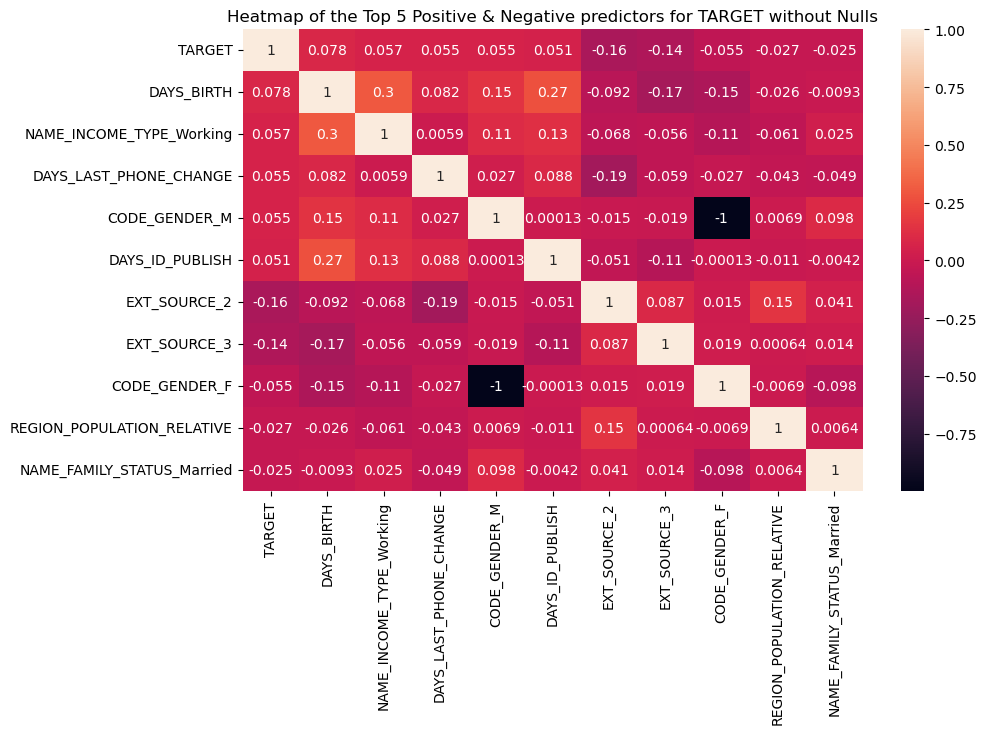

In [113]:
plt.figure(figsize=(10,6))
sns.heatmap(app_train_final.corr(), annot=True)
plt.title('Heatmap of the Top 5 Positive & Negative predictors for TARGET without Nulls')
plt.show()

In [114]:
app_train_final.columns

Index(['TARGET', 'DAYS_BIRTH', 'NAME_INCOME_TYPE_Working',
       'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER_M', 'DAYS_ID_PUBLISH',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'CODE_GENDER_F',
       'REGION_POPULATION_RELATIVE', 'NAME_FAMILY_STATUS_Married'],
      dtype='object')

In [115]:
app_train_final.isnull().sum()

TARGET                        0
DAYS_BIRTH                    0
NAME_INCOME_TYPE_Working      0
DAYS_LAST_PHONE_CHANGE        0
CODE_GENDER_M                 0
DAYS_ID_PUBLISH               0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
CODE_GENDER_F                 0
REGION_POPULATION_RELATIVE    0
NAME_FAMILY_STATUS_Married    0
dtype: int64

In [116]:
app_test_final.isnull().sum()

DAYS_BIRTH                    0
NAME_INCOME_TYPE_Working      0
DAYS_LAST_PHONE_CHANGE        0
CODE_GENDER_M                 0
DAYS_ID_PUBLISH               0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
CODE_GENDER_F                 0
REGION_POPULATION_RELATIVE    0
NAME_FAMILY_STATUS_Married    0
dtype: int64

<br> There are several predictors in this model. </br>

Only the top 5 positive and negative will be used in the logistic regression model

# Preliminary Logistic Model

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


#Defining the training variables:
X_train = app_train_final.drop(columns=['TARGET'])  # Train features
y_train = app_train_final['TARGET']  # Train target

X_test = app_test_final

#Training the model
log_reg = LogisticRegression(max_iter=10000, random_state=2)
log_reg.fit(X_train, y_train)

# Predicting on the train set
y_train_preds = log_reg.predict(X_train) 
y_train_preds_proba = log_reg.predict_proba(X_train)[:, 1]  

# Predicting on the test set
y_test_preds_proba = log_reg.predict_proba(X_test)[:, 1] 





In [120]:
# Coefficients of the logistic model in log odds
log_reg.coef_

array([[ 1.97664638e-05,  2.31183632e-01,  8.05160754e-05,
         3.23073390e-01,  5.08881137e-05, -2.42698154e+00,
        -2.47713613e+00, -2.27297267e-02, -3.15521447e-02,
        -1.48504705e-01]])

In [121]:
# Intercept of the logistic model
log_reg.intercept_

array([0.29816342])

In [122]:
accuracy = accuracy_score(y_train, y_train_preds)
roc_auc = roc_auc_score(y_train, y_train_preds_proba)
conf_matrix = confusion_matrix(y_train, y_train_preds)


## Preliminary Logistic Metrics and Scoring

In [124]:
print(accuracy_score(y_train, y_train_preds)) #since we dont have TARGET on the test dataset, the train dataset is used for accuracy

0.9191931345545362


In [125]:
print(roc_auc_score(y_train, y_train_preds_proba))

0.7126630576819053


In [126]:
print(classification_report(y_train, y_train_preds))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    282686
           1       0.34      0.00      0.00     24825

    accuracy                           0.92    307511
   macro avg       0.63      0.50      0.48    307511
weighted avg       0.87      0.92      0.88    307511



In [127]:
print(confusion_matrix(y_train, y_train_preds))

[[282637     49]
 [ 24800     25]]


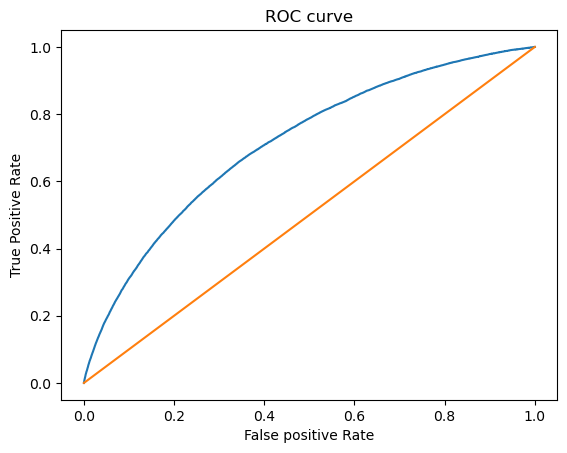

In [128]:
#Creating an ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_train_preds_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [129]:
# Improvement vs randomly guessing
ROC = 0.71
guess = 0.50

round((ROC - guess)/guess,2)


0.42

The ROC is 0.72. 
This means compared to randomly guessing the model performs 42% better


# Summary and Overall Insights with Ethical Considerations


In [132]:
print('The Top 3 Positive predictors of Default are: \n')

print(top_5_positive[1:4])

The Top 3 Positive predictors of Default are: 

DAYS_BIRTH                  0.078239
NAME_INCOME_TYPE_Working    0.057481
DAYS_LAST_PHONE_CHANGE      0.054964
Name: TARGET, dtype: float64


In [133]:
print('The Top 3 Negative predictors of Default are: \n')

print(top_5_negative[0:3])


The Top 3 Negative predictors of Default are: 

EXT_SOURCE_2    -0.160295
EXT_SOURCE_3    -0.135996
CODE_GENDER_F   -0.054704
Name: TARGET, dtype: float64


Overall there are several coefficients responsible for affecting TARGET.

Positive Correlations with TARGET (Default):
1. Days_birth: Older individuals are more likely to default. This may due to approaching retirement (or being retired), having reduced income, or lifestyle changes
2. Name_Income_Type_Working: Clients who are employees rather than business owners are more likely to default. This may be due to less disposable income compared to owning a successfull business which also has more leverage to capital
3. DAYS_Last_Phone_Change:  Clients that have recently changed their phone numbers are at a higher default risk. This could be due to financial instability by trying to avoid creditors. It could also indiciate trying to attempt fraud

If we decline or approve clients based on such factors, it could be lead to having a very niche clientele while also being unfair to the older or working demographics and even those with recent phone number changes.
In the meantime, it could benefit the clients that are younger and are business owners. This could be contradictory to Home Credits goal of assisting clients with non sufficient credit history as business owners tend to have decent credit due to having financing such as a line of credit or a business loan.

Negative Correlations with TARGET (Default):
1. EXT SOURCE 2 & EXT SOURCE 3: Having a decent credit score is likely to decrease the chance of default. This makes sense as its a solid predictor of credit worthiness. If a client can pay their bills, they are likely to repay their loans.
2. CODE GENDER F: It appears that females are less likely to default than males. This could be due to females having different spending habits in general (on average)

Approving such clients would benefit those who have strong credit and are female. This would be unfair to the clients who are working towards getting better credit and also to males. Gender should not be a significant factor in asssessing an application since it is discrimination and is unfair.

Data Summary:
The Null values were cleaned. Null values exceeding 50% had their columns removed whereas Null values that were < 50% of the entire dataset were imputed with the median.
Secondly, the categorical columns were converted using One Hot Encoder. Outliers were also imputed with the median rather than removing them entirely. This is because Kaggle will not accept submissions that have the rows deleted in the test set.


Logistic Model:                                          
The model itself has a high accuracy and a good ROC score. But the confusion matrix showed that it has low True positives and False positives.
This model appears to be more beneficial to detecting 0 for the Target variable (clients who dont have default issues).
During the final modelling assignment, the model will need to be improved to detect clients who have a higher default rate which is a Target Variable of 1. Perhaps we can use scaling, or choose other predictors. 
